In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("marketing_AB.csv", encoding="Latin-1")

In [4]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [7]:
df.duplicated(subset='user id').sum()

np.int64(0)

In [8]:
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [9]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [10]:
df_categ = df[['test group', 'converted', 'most ads day', 'most ads hour']]

df_categ.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [11]:

for i in df_categ.columns:
    print(i.upper(),":", df_categ[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate Analysis

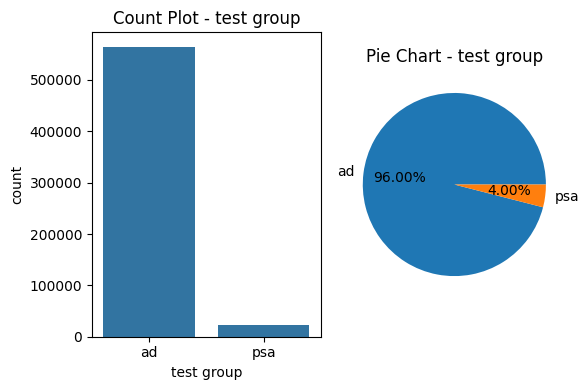

In [21]:
variable = 'test group'

plt.figure(figsize=(6,4))


plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_categ)
plt.title(f'Count Plot - {variable}')

plt.subplot(1, 2, 2)
counts = df_categ[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()


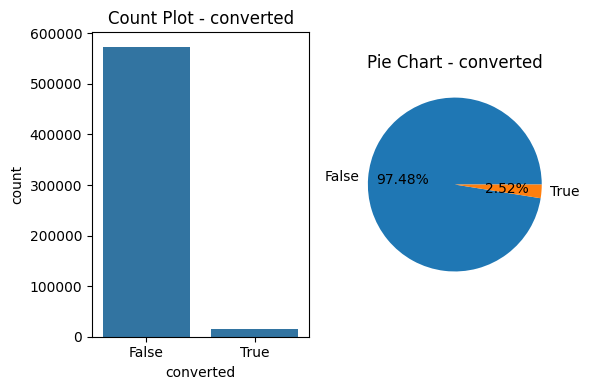

In [ ]:
variable = 'converted'

plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_categ)
plt.title(f'Count Plot - {variable}')


plt.subplot(1, 2, 2)
counts = df_categ[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')


plt.tight_layout()
plt.show()

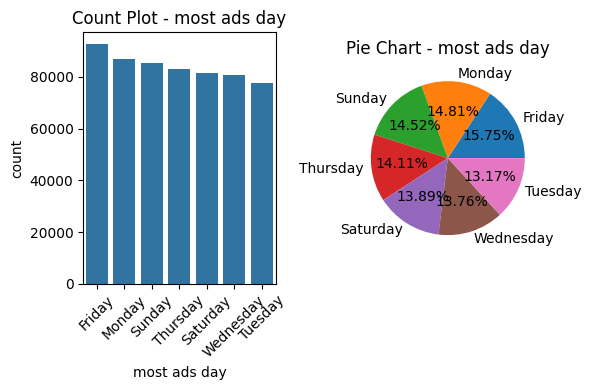

In [26]:
variable = 'most ads day'

plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_categ, order=df_categ['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks( rotation=45)

plt.subplot(1, 2, 2)
counts = df_categ[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')


plt.tight_layout()
plt.show()

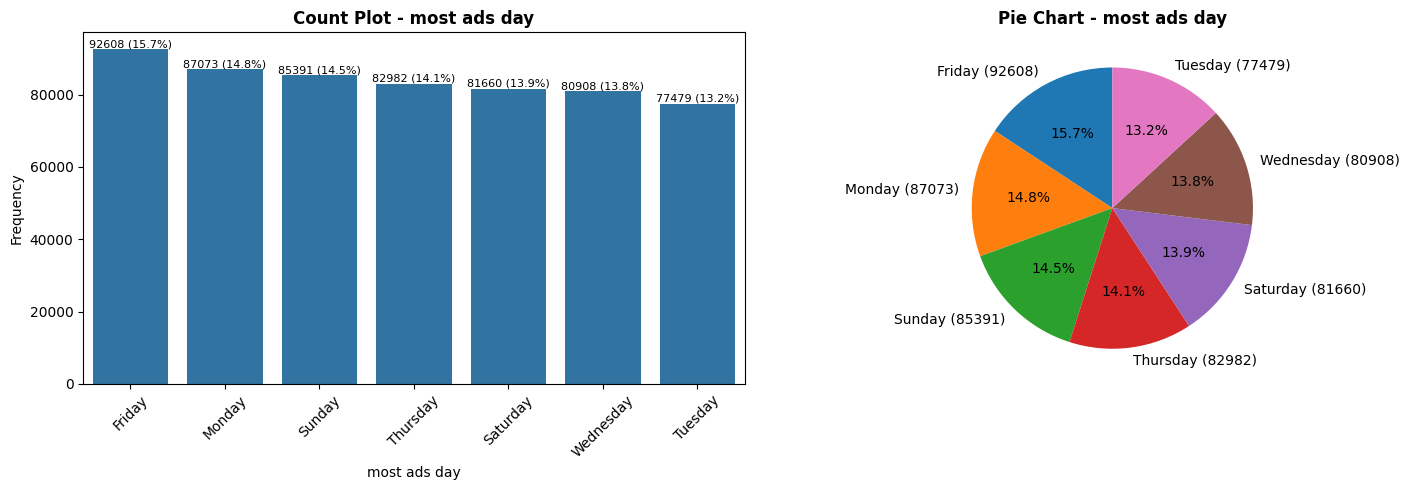

In [30]:
variable = 'most ads day'
counts = df_categ[variable].value_counts()

plt.figure(figsize=(15, 5))  # Wider layout for presentations

# --- Count Plot ---
plt.subplot(1, 2, 1)
barplot = sns.countplot(x=variable, data=df_categ, order=counts.index)
plt.title(f'Count Plot - {variable}', fontsize=12, fontweight='bold')
plt.xlabel(variable, fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=45)

# Add value labels on bars (percentage + count)
total = len(df_categ)
for p in barplot.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.1f}%'
    barplot.annotate(f'{count} ({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=8)

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.pie(counts, labels=[f'{label} ({value})' for label, value in zip(counts.index, counts)],
        autopct='%0.1f%%', startangle=90)
plt.title(f'Pie Chart - {variable}', fontsize=12, fontweight='bold')

# Overall layout
plt.tight_layout()
plt.show()


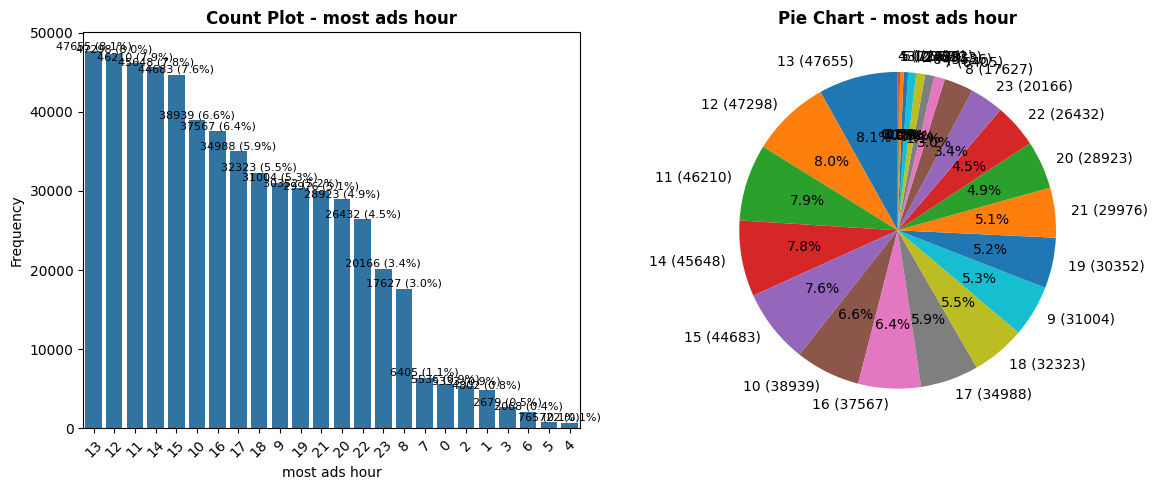

In [31]:
variable = 'most ads hour'
counts = df_categ[variable].value_counts()

plt.figure(figsize=(12, 5))  # Wider layout for presentations

# --- Count Plot ---
plt.subplot(1, 2, 1)
barplot = sns.countplot(x=variable, data=df_categ, order=counts.index)
plt.title(f'Count Plot - {variable}', fontsize=12, fontweight='bold')
plt.xlabel(variable, fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=45)

# Add value labels on bars (percentage + count)
total = len(df_categ)
for p in barplot.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.1f}%'
    barplot.annotate(f'{count} ({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=8)

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.pie(counts, labels=[f'{label} ({value})' for label, value in zip(counts.index, counts)],
        autopct='%0.1f%%', startangle=90)
plt.title(f'Pie Chart - {variable}', fontsize=12, fontweight='bold')

# Overall layout
plt.tight_layout()
plt.show()


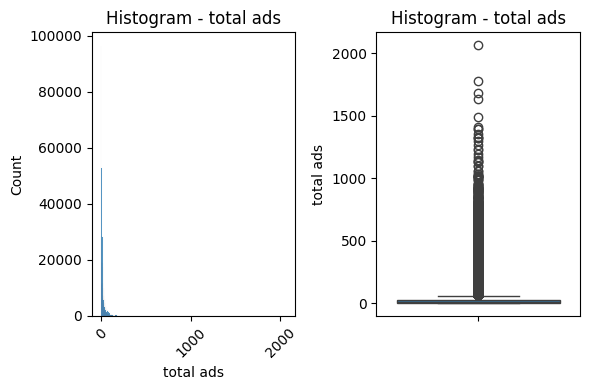

In [32]:
variable = 'total ads'

plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')
plt.xticks( rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df)
plt.title(f'Histogram - {variable}')


plt.tight_layout()
plt.show()

In [33]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

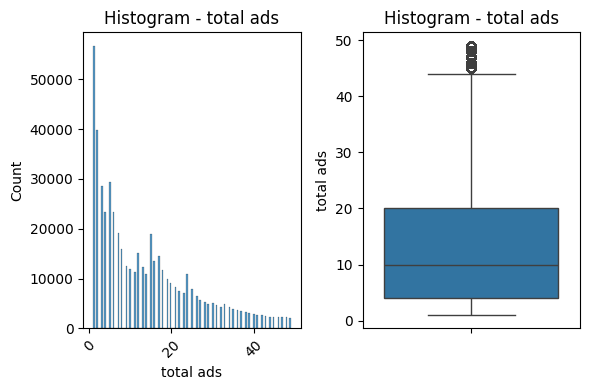

In [34]:
variable = 'total ads'

plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df[df['total ads']< 50] )
plt.title(f'Histogram - {variable}')
plt.xticks( rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df[df['total ads']< 50])
plt.title(f'Histogram - {variable}')


plt.tight_layout()
plt.show()

# Bivariate Analysis

In [35]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [36]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


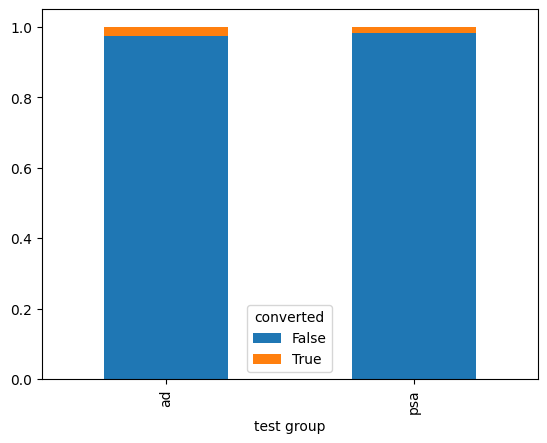

In [37]:
ct_conversion_test_group.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

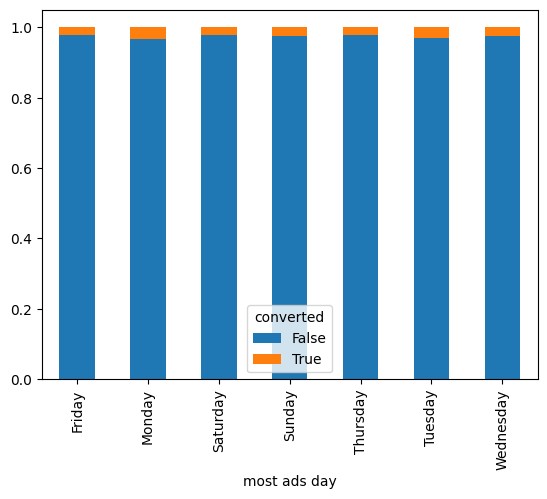

In [39]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

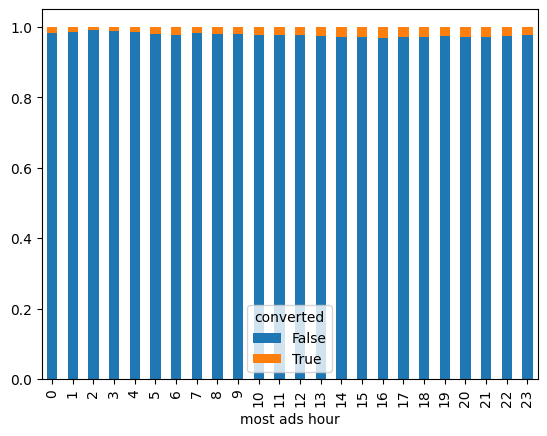

In [40]:
ct_conversion_day = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

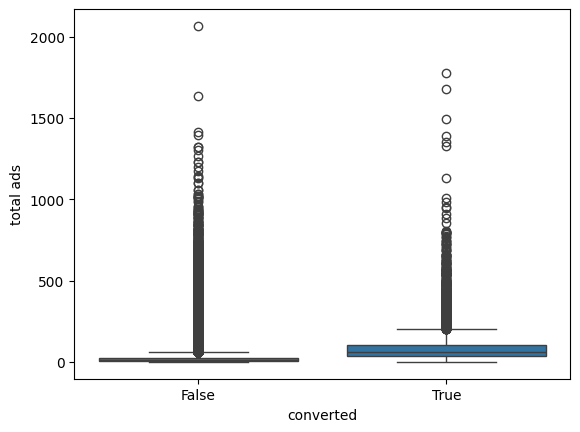

In [42]:
sns.boxplot(x='converted', y='total ads', data=df)

<Axes: xlabel='converted', ylabel='total ads'>

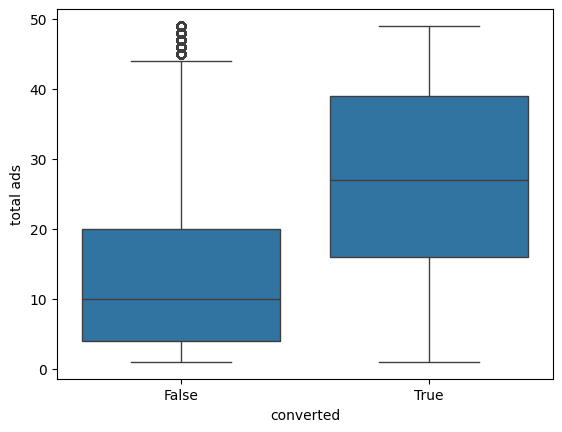

In [41]:
sns.boxplot(x='converted', y='total ads', data=df[df['total ads']< 50])

# Statistical Test

In [48]:
from scipy.stats import chi2_contingency

alpha = 0.05

for variable in df_categ.columns:
    if variable != 'converted':
        contingency_table = pd.crosstab(df_categ[variable], df_categ['converted'])

        chi2, p, _, _ = chi2_contingency(contingency_table)  

        print(f"\nChi-squared test for {variable} vs. converted:")  
        print(f"Chi-squared value: {chi2:.3f}")
        print(f"p-value: {p:.5f}")

        if p < alpha:
            print(f"✅ Significant! The conversion rates vary across {variable}.")
        else:
            print(f"❌ Not Significant. No strong relationship between {variable} and conversion.")



Chi-squared test for test group vs. converted:
Chi-squared value: 54.006
p-value: 0.00000
✅ Significant! The conversion rates vary across test group.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.048
p-value: 0.00000
✅ Significant! The conversion rates vary across most ads day.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.769
p-value: 0.00000
✅ Significant! The conversion rates vary across most ads hour.


In [53]:

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
# Step 1: Check Assumptions # Normality assumption

shapiro_stat_true, shapiro_p_value_true = shapiro (df [df ['converted'] == True]['total ads']) 
shapiro_stat_false, shapiro_p_value_false = shapiro (df [df ['converted'] == False] ['total ads'])

print (f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}") 
print (f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene (df [df ['converted']]['total ads'], df [df['converted']]['total ads']) 
print (f"Levene's test for equality of variances: p-value = {levene_p_value}")


Shapiro-Wilk test for normality (True group): p-value = 1.638680987007864e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430733551e-204
Levene's test for equality of variances: p-value = 1.0


In [ ]:
# Step 2: Perform a Suitable Test
alpha = 0.05
if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    t_stat, t_p_value = ttest_ind (df [df ['converted']]['total ads'], df[df ['converted']]['total ads']) 
    print (f"Independent two-sample t-test: p-value = {t_p_value}")

else:
    u_stat, u_p_value = ttest_ind(df[df['converted']]['total ads'], df[df['converted']]['total ads'])
    print(f"Mann-Whitneyu U Test : P-value = {u_p_value}")

Mann-Whitneyu U Test : P-value = 0.0
